/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


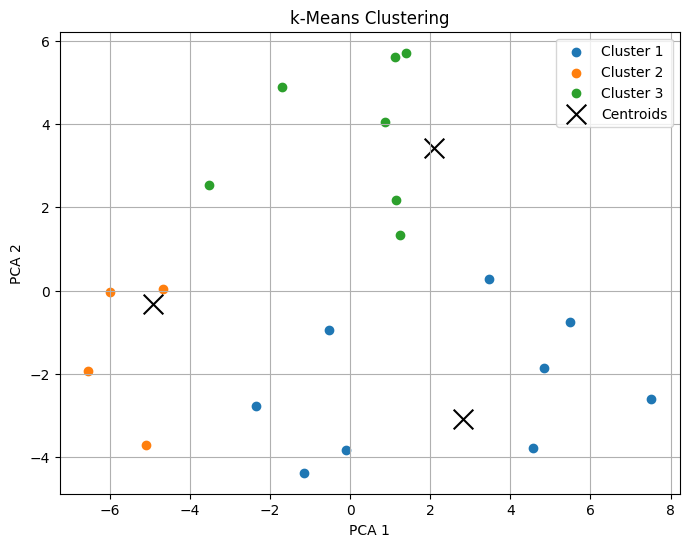

Cluster Labels: [0 2 2 1 0 1 2 1 0 0 2 2 0 0 2 0 2 0 0 1]
Final Centroids: 
[[3.33711888 6.30600844 7.43236472 5.68880078]
 [7.01995113 1.18082009 3.59995049 2.09039884]
 [2.80492695 5.06517314 1.15799    7.01033739]]
Within-Cluster Sum of Squares (WCSS): 368.05072226540824


In [16]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(20, 4) * 10

def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_labels(X, centroids):
    labels = []
    for point in X:
        distances = np.linalg.norm(point - centroids, axis=1)  # Euclidean distance
        label = np.argmin(distances)
        labels.append(label)
    return np.array(labels)

def compute_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_points = X[labels == i]
        centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

def compute_wcss(X, labels, centroids):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        wcss += np.sum((cluster_points - centroids[i]) ** 2)
    return wcss

def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    prev_centroids = np.zeros_like(centroids)
    labels = np.zeros(X.shape[0])

    for _ in range(max_iters):
        labels = assign_labels(X, centroids)

        centroids = compute_centroids(X, labels, k)

        if np.all(np.abs(centroids - prev_centroids) < tol):
            break

        prev_centroids = centroids.copy()

    return labels, centroids

k = 3
labels, centroids = kmeans(X, k)

wcss = compute_wcss(X, labels, centroids)

def pca_reduce(X, n_components=2):
    mean_X = np.mean(X, axis=0)
    centered_X = X - mean_X
    covariance_matrix = np.cov(centered_X.T)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]
    reduced_X = centered_X.dot(eigenvectors[:, :n_components])
    return reduced_X

if X.shape[1] > 2:
    X_pca = pca_reduce(X, n_components=2)
    centroids_pca = pca_reduce(centroids, n_components=2)
else:
    X_pca = X
    centroids_pca = centroids

plt.figure(figsize=(8, 6))

for i in range(k):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i+1}')

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', color='black', s=200, label='Centroids')

plt.title('k-Means Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()

#results
print(f"Cluster Labels: {labels}")
print(f"Final Centroids: \n{centroids}")
print(f"Within-Cluster Sum of Squares (WCSS): {wcss}")
